

# Performance Assessment: D208 Predictive Modeling Task 2 - Logistic Regression.

## Michael Hindes
Department of Information Technology, Western Governors University
<br>D208: Predictive Modeling 
<br>Professor Dr. Straw
<br>March 21, 2024


<a id='PartA1'></a>
## A1: Research Question

Which intervenable factors are statistically associated with the likelihood of hospital readmission within 30 days post-discharge, and how do they quantitatively impact the risk of this readmission?

<a id="#PartA2"></a>
## A2: Objectives and Goals of Analysis

Hospital readmissions not only indicate potentially preventable health complications but also impose a significant financial burden on the healthcare system. The primary objective of this analysis is to identify and quantify actionable risk factors that significantly influence the likelihood of hospital readmission within 30 days post-discharge. By pinpointing specific areas where knowledge can meaningfully empower decision-makers and healthcare professionals, this analysis aims to facilitate interventions, ranging from patient conversations to policy changes, ultimately decreasing readmission rates and improving patient care outcomes. To achieve this goal, we'll construct and refine a logistic regression model to statistically ascertain the impact of various health-related variables on the risk of readmission. Through this process, it is the goal to provide insights that can guide targeted efforts to reduce readmissions and enhance the overall quality of healthcare delivery.


# Part II: Method Justification

## B. Describe logistic regression methods by doing the following:

### **B1. Summarize **four** assumptions of a logistic regression model**

- **Binary Dependent Variable**: Logistic regression is designed for binary outcomes. This means the dependent variable should represent two categories, such as pass/fail, yes/no, or present/absent. This binary nature allows the model to estimate the probability of an observation belonging to one of the two categories.

- **Linear Relationship to Log Odds**: The core of logistic regression is modeling the log odds of the dependent variable as a linear combination of the independent variables. This assumption does not mean the relationship between the predictors and the outcome is linear; rather, it's the relationship between the predictors and the log odds of the outcome that should be linear.

- **Independence Among Independent Variables**: The predictors (independent variables) should not be too highly correlated with each other. High correlation, or multicollinearity, can make it difficult to discern the individual effect of each predictor on the outcome.

- **Sufficient Sample Size**: Logistic regression models require a sufficiently large sample size to produce reliable estimates. The complexity of the model and the estimation process, particularly the use of maximum likelihood estimation, requires a larger number of observations compared to simpler models like linear regression.(Bobbitt, 2020)

### **B2. Describe two benefits of using Python for data analysis:**

- **Numerous and dynamic Libraries:** Python offers a suite of libraries that support every stage of data analysis. Pandas is used for data manipulation, NumPy for numerical computations, and Matplotlib and Seaborn for visualizations. Statsmodels and Scikit-learn provide tools for applying regression and machine learning algorithms, simplifying the creation of predictive models. These libraries cover a wide range of data analysis needs.

- **Versatility** Python is known for its intuitive and readable syntax, making it a popular choice for various applications, from data science to web development. This versatility allows analysts to easily switch between tasks, such as analyzing data and deploying machine learning models as web applications, all within the same programming environment. Python's flexibility is a significant advantage for working across multiple domains.

### **B3. Explain why logistic regression is an appropriate technique for analyzing the research question summarized in part I:**

Unlike linear regression, which predicts continuous values based on a Gaussian distribution, logistic regression addresses classification problems using the Bernoulli distribution, modeling binary outcomes (0 or 1, Yes or No, success or failure). In logistic regression, the objective is to model the probability that a given observation falls into the "success" category (1), based on a set of explanatory variables. The Bernoulli distribution provides the framework for this modeling, naturally describing situations with two possible outcomes, aligning with the binary nature of the dependent variable in logistic regression. The y-axis represents this probability, while the x-axis depicts the linear combination of the explanatory variables, linking our explanatory variables to the likelihood of falling into one of two categories. For each factor (explanatory variable), the logistic regression model yields a coefficient. This coefficient can be transformed into odds ratios (OR) by taking its exponential, offering a quantitative measure of how much the odds of readmission increase (OR > 1) or decrease (OR < 1) with a one-unit increase in the factor, assuming all other factors remain constant.

**(The Python code used in the project was heavily informed and sometimes directly puulled from the documentation listed in the `Software` section of the References section concluding this project )**

In [1]:
# Import packages and libraries
%pip install statsmodels
%pip install Jinja2
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


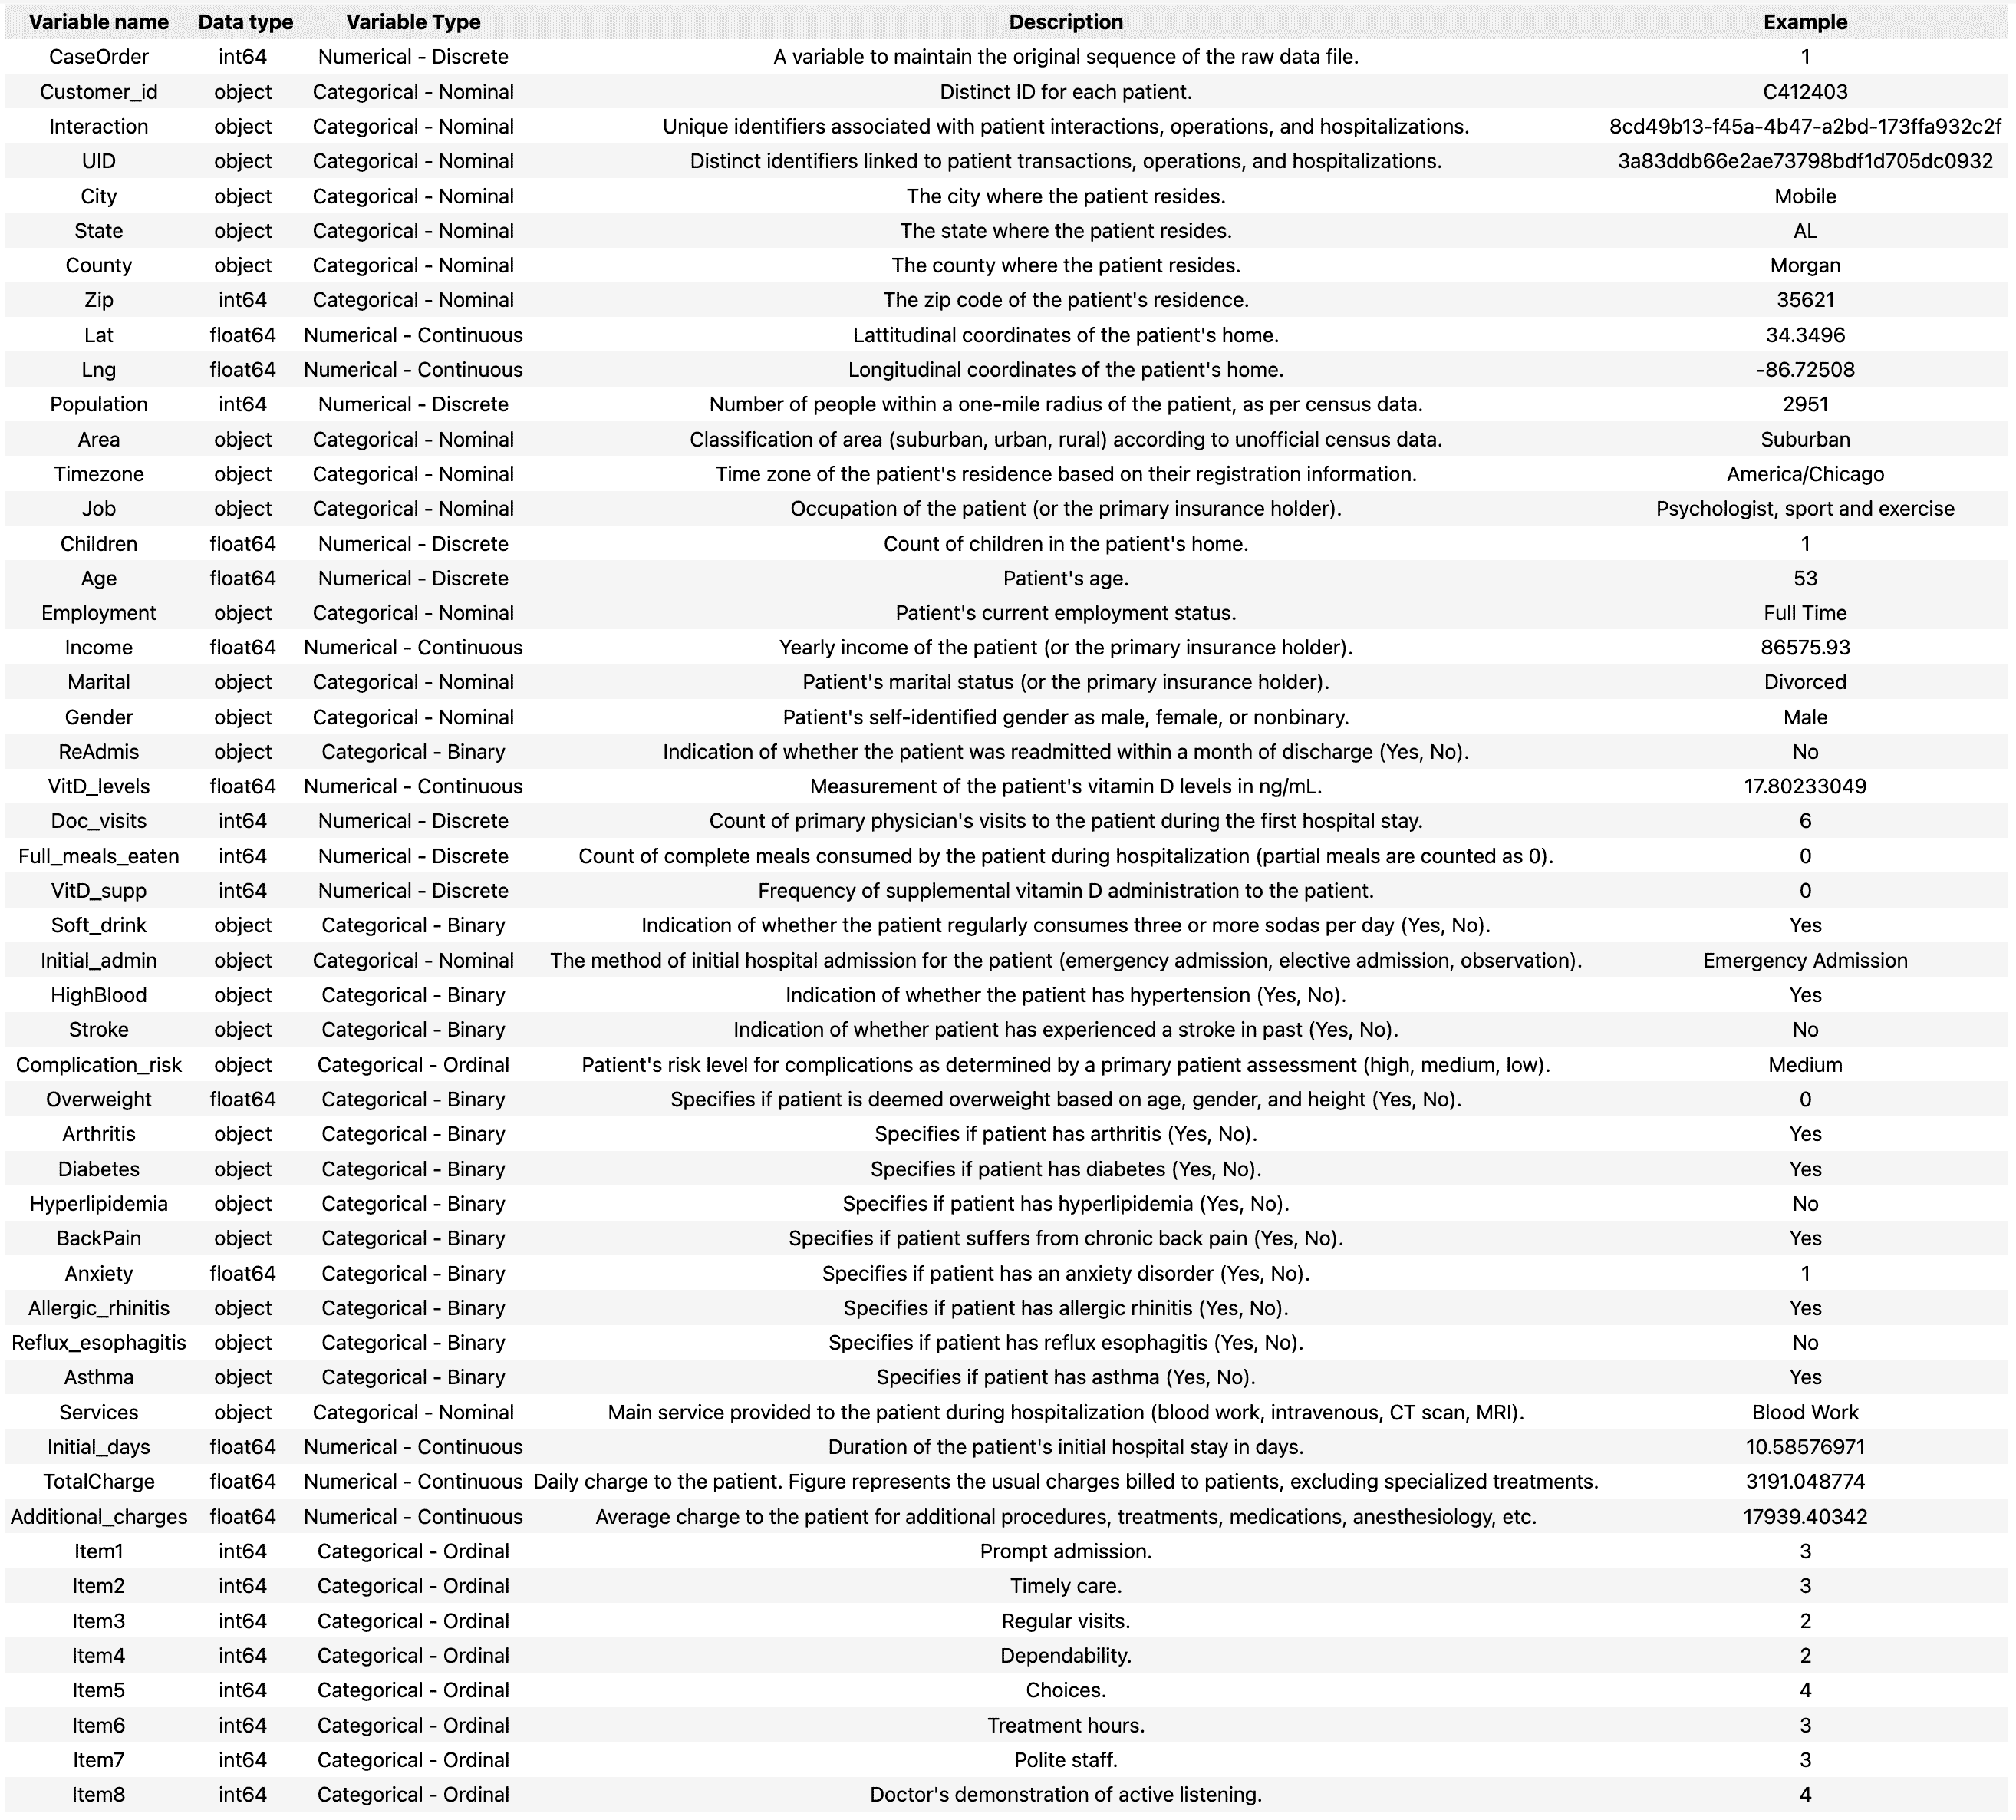

In [2]:
# original data variable description and data types with examples.
from IPython.display import Image
Image(filename='variable_description_208.png')

In [3]:
# import the data and read it into a dataframe, setting the first column `CaseOrder` as the index for consistency.
df_medical = pd.read_csv('medical_clean.csv')

# Display the first five rows of the data
df_medical.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Check the DataFrame information
df_medical.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Check for duplicate rows. 
print(df_medical.duplicated().value_counts())
print('Total Duplicated Rows: ', df_medical.duplicated().sum())

False    10000
Name: count, dtype: int64
Total Duplicated Rows:  0


In [6]:
# Check for null values
df_medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# rename columns Item 1 to Item 8 to the appropriate column names. The 'S_' modifier is used to indicate the column is a survey item.
new_col_names={
    'Item1':'S_T_Admission',
    'Item2':'S_T_Treatment', 
    'Item3':'S_T_Visits', 
    'Item4':'S_Reliability', 'Item5':'S_Options', 
    'Item6':'S_Hours_Treatment', 
    'Item7':'S_Staff', 
    'Item8':'S_Active_Listening'}
df_medical.rename(columns=new_col_names, inplace=True)
df_medical.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'S_T_Admission', 'S_T_Treatment',
       'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment',
       'S_Staff', 'S_Active_Listening'],
      dtype='object')

In [8]:
# combine the data types and unique values count into a DataFrame easy reference and comparison
data_types = df_medical.dtypes
unique_values = df_medical.nunique()
comparison_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values})
comparison_df.sort_values(by='Unique Values', ascending=False)

,Data Type,Unique Values
CaseOrder,int64,10000
Interaction,object,10000
UID,object,10000
Customer_id,object,10000
Initial_days,float64,9997
TotalCharge,float64,9997
Income,float64,9993
VitD_levels,float64,9976
Additional_charges,float64,9418
Lng,float64,8725


# Cardinality and Data Type Summary of Variables

## Numerical Variables
- `Income`: 9993 unique values (float64)
- `VitD_levels`: 9976 unique values (float64)
- `Initial_days`: 9997 unique values (float64)
- `TotalCharge`: 9997 unique values (float64)
- `Additional_charges`: 9418 unique values (float64)
- `Population`: 5951 unique values (int64)
- `Children`: 11 unique values (int64)
- `Age`: 72 unique values (int64)
- `Doc_visits`: 9 unique values (int64)
- `Full_meals_eaten`: 8 unique values (int64)
- `vitD_supp`: 6 unique values (int64)
- `Lat`: 8588 unique values (float64)
- `Lng`: 8725 unique values (float64)

## Ordinal Variables (Categorical)
- `S_T_Admission`: 8 unique values (int64)
- `S_T_Treatment`: 7 unique values (int64)
- `S_T_Visits`: 8 unique values (int64)
- `S_Reliability`: 7 unique values (int64)
- `S_Options`: 7 unique values (int64)
- `S_Hours_Treatment`: 7 unique values (int64)
- `S_Staff`: 7 unique values (int64)
- `S_Active_Listening`: 7 unique values (int64)

## Nominal Variables (Categorical)
- `Customer_id`: 10000 unique values (object)
- `Interaction`: 10000 unique values (object)
- `UID`: 10000 unique values (object)
- `City`: 6072 unique values (object)
- `State`: 52 unique values (object)
- `County`: 1607 unique values (object)
- `Zip`: 8612 unique values (int64)
- `Area`: 3 unique values (object)
- `TimeZone`: 26 unique values (object)
- `Job`: 639 unique values (object)
- `Marital`: 5 unique values (object)
- `Gender`: 3 unique values (object)
- `ReAdmis`: 2 unique values (object)
- `Soft_drink`: 2 unique values (object)
- `Initial_admin`: 3 unique values (object)
- `HighBlood`: 2 unique values (object)
- `Stroke`: 2 unique values (object)
- `Complication_risk`: 3 unique values (object)
- `Overweight`: 2 unique values (object)
- `Arthritis`: 2 unique values (object)
- `Diabetes`: 2 unique values (object)
- `Hyperlipidemia`: 2 unique values (object)
- `BackPain`: 2 unique values (object)
- `Anxiety`: 2 unique values (object)
- `Allergic_rhinitis`: 2 unique values (object)
- `Reflux_esophagitis`: 2 unique values (object)
- `Asthma`: 2 unique values (object)
- `Services`: 4 unique values (object)

**Given the nature of the data, there are several variables that will be excluded from the analysis. Here is a brief summary of the variables that will be excluded and the rationale for their exclusion:**

### Current Strategy Overview:
1. **Broad Inclusion**: *Cast a wide net* (Middleton, 2024) Start with a wide array of variables to capture potential influences on `Initial_days`, informed by domain knowledge and based on the reccomendation of the instructors of this course. 
2. **Build Initial Model**: Use this dataset to identify significant variables.
3. **Analyze & Refine**: Eliminate non-contributing or highly correlated variables based on initial model insights.
4. **Develop Reduced Model**: Focus on key variables for a streamlined, effective model.

### Variables Eliminated:
*Note: I am a former health care professional who has worked in several hospitals, and unfortunatly have had extensive hospital stays as a patient as well. While I am not an expert on this particular data, I do have some domain knowledge, and this domain knowledge helps inform some of my decision making here.*
- **TotalCharge & Additional Charges**: Possible high correlation and generally a result of `Initial_days` not a cause of. Patients and staff often unaware of these charges until after the fact.
- **Latitude & Longitude**: Limited interpretive value and adds to model complexity.
- **Identifiers (Customer_id, Interaction, UID)**: High uniqueness; ethical concerns.
- **Geographic (City, State, County, Zip, Population)**: Overly detailed, increasing model complexity, not short/medium term actionable.
- **TimeZone**: Relevance to hospital stay length is questionable, increases complexity.
- **Full_meals_eaten**: Restrictive and targeted diets and meals are so common and depends on patient and services that without context ths variable is not useful.
- **Job**: Subjective and variable in interpretation. Better suited for targeted occupational study.
- **Services**: All very common in diagnostic phase and itself dependent on too many unknown factors, and not likely to be significant predictors. Could add confusion. 
- **Soft_drink**: Poorly defined as soft drink can mean anything from un-caffinated carbonated water to a caffinated sugary soda.
- **Survey_Items**: These are highly subjective and lack context. They are also not actionable in the short term, and we do not know at which point in the admission process they were given: after or during initial stay, during or after readmission for some, or they received their bills?
- **ReAdmis**: Readmission by definition happen after the initial stay, so this is not a predictor, but possibly a result of it in terms of temporal order.
- **Gender**: Specifically because the data dictionary states self-identified, and all gender groups are not represented, the subjective nature and lack of inclusion make the accuracy of this variable questionable.
- **VitD_supp**: Lack of context and possible interaction with other variables related to health conditions.
- **Income, Marital, Children**: All might not be related to the patient per the data dictionary. In this context, the same "households" could could show as the same "person" in the dataset, but be two different people with different underlying conditions or situations. THis analysis assumes our observations are of individuals, not households. 
- **Complication_risk**: LAck of clarity on what this means, and may directly be tied to health related variables like high_blood or diabetes, possibly intruding interactions difficult to account for without more information.
- **Area**: A category prone to change and subjective interpretation since the data was collected.

### Variables Eliminated:

*Note: I am a former health care professional who has worked in several hospitals, While I am not an expert on this particular data, I do have some domain knowledge, and this domain knowledge helps inform some of my decision making here.*

- **TotalCharge & Additional Charges**: Charges are dependent on too many factors and often not accessible to health professionals. Patients and staff are often unaware of these charges until after the fact.
- **Latitude & Longitude**: Limited interpretive value and adds to model complexity.
- **Identifiers (Customer_id, Interaction, UID, CaseOrder)**: High uniqueness; ethical concerns.
- **Geographic (City, State, County, Zip, Population)**: Overly detailed, increasing model complexity, not short/medium term actionable.
- **Area**: Likely to have changed since data was collected, not very actionable.
- **TimeZone**: Relevance to hospital stay length is questionable, increases complexity.
- **Full_meals_eaten**: Restrictive and targeted diets and meals are so common and depend on patient and services that without context, this variable is not useful.
- **Job**: Subjective and variable in interpretation. Better suited for a targeted occupational study.
- **Services**: All very common in the diagnostic phase and itself dependent on too many unknown factors, and not likely to be significant predictors. Could add confusion.
- **Soft_drink**: Poorly defined as a soft drink can mean anything from non-caffeinated carbonated water to a caffeinated sugary soda.
- **Survey_Items**: These are highly subjective and lack context. They are also not actionable in the short term, and we do not know at which point in the admission process they were given: after initial stay, during readmission, or after readmission?. Additionally, they are correlated.
- **VitD_supp**: Time of supplementation: unclear if during readmission or initial admission.
- **Gender**: Specifically because the data dictionary states self-identified, and all gender groups are not represented, the subjective nature and lack of inclusion make the accuracy of this variable questionable.
- **VitD_levels**: Time of measurement unclear: readmission or initial admission?
- **Complication_risk**: The time frame for this is not defined: during readmission, initial admission, or after discharge?
- **Income, Marital, Children**: All might not be related to the patient per the data dictionary.

In [9]:
# Let's create a reduced dataframe with only initial variables of interest.
# 
col_drop = ['Children', 'CaseOrder', 'TotalCharge', 'Services', 'Soft_drink', "Gender", 'Additional_charges', 'Lat', 'Full_meals_eaten', 'Income', 'Marital', 'Lng', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Job', 'Population', 'Area', 'S_T_Treatment', 'S_T_Admission', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening', 'VitD_levels', 'vitD_supp', 'Complication_risk']
df_reduced = df_medical.drop(col_drop, axis=1)


In [10]:
# Standardize the column names for consistency
df_reduced.columns = df_reduced.columns.str.lower()
df_reduced.rename(columns={'highblood':'high_blood', 'backpain':'back_pain'}, inplace=True)

# display the dataframe in full
pd.set_option('display.max_columns', None)
df_reduced.head().transpose()

,0,1,2,3,4
age,53,51,53,78,22
readmis,No,No,No,No,No
doc_visits,6,4,4,4,5
initial_admin,Emergency Admission,Emergency Admission,Elective Admission,Elective Admission,Elective Admission
high_blood,Yes,Yes,Yes,No,No
stroke,No,No,No,Yes,No
overweight,No,Yes,Yes,No,No
arthritis,Yes,No,No,Yes,No
diabetes,Yes,No,Yes,No,No
hyperlipidemia,No,No,No,No,Yes


-    Rounding `'Initial_days'` from 8 decimal places to 2 reduces the number of unique values, which can simplify analyses and visualizations by reducing the granularity of the data. Precision beyond 2 decimal places for representing days does not add meaningful information for the analysis. In many practical scenarios, especially related to days, a precision of 2 decimal places is sufficient to capture relevant variations without unnecessarily complicating the dataset.  In healthcare data, for instance, it's unlikely that fractions of a day to eight decimal places would impact decisions or care outcomes.

In [11]:
df_reduced = df_reduced.round({'initial_days': 2})
df_reduced.nunique()

age                     72
readmis                  2
doc_visits               9
initial_admin            3
high_blood               2
stroke                   2
overweight               2
arthritis                2
diabetes                 2
hyperlipidemia           2
back_pain                2
anxiety                  2
allergic_rhinitis        2
reflux_esophagitis       2
asthma                   2
initial_days          4309
dtype: int64

# Reassess Cardinality and Data Types

## Numerical Variables
- `initial_days`: 4309 unique values (float64)
- `age`: 72 unique values (int64)
- `doc_visits`: 9 unique values (int64)

## Categorical Variables
- `readmis`: 2 unique values (object)
- `initial_admin`: 3 unique values (object)
- `high_blood`: 2 unique values (object)
- `stroke`: 2 unique values (object)
- `overweight`: 2 unique values (object)
- `arthritis`: 2 unique values (object)
- `diabetes`: 2 unique values (object)
- `hyperlipidemia`: 2 unique values (object)
- `back_pain`: 2 unique values (object)
- `anxiety`: 2 unique values (object)
- `allergic_rhinitis`: 2 unique values (object)
- `reflux_esophagitis`: 2 unique values (object)
- `asthma`: 2 unique values (object)

In [12]:
# Export DataFrame to CSV, including the default index
df_reduced.to_csv('df_reduced.csv')

# Import CSV into DataFrame, setting the first column (default index) as the index
df_reduced = pd.read_csv('df_reduced.csv', index_col=0)
df_reduced.head()

,age,readmis,doc_visits,initial_admin,high_blood,stroke,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,initial_days
0,53,No,6,Emergency Admission,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.59
1,51,No,4,Emergency Admission,Yes,No,Yes,No,No,No,No,No,No,Yes,No,15.13
2,53,No,4,Elective Admission,Yes,No,Yes,No,Yes,No,No,No,No,No,No,4.77
3,78,No,4,Elective Admission,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,1.71
4,22,No,5,Elective Admission,No,No,No,No,No,Yes,No,No,Yes,No,No,1.25


In [13]:
# Summary statistics for the DataFrame
df_reduced.describe()

,age,doc_visits,initial_days
count,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,34.455284
std,20.638538,1.045734,26.309382
min,18.000000,1.000000,1.000000
25%,36.000000,4.000000,7.900000
50%,53.000000,5.000000,35.840000
75%,71.000000,6.000000,61.162500
max,89.000000,9.000000,71.980000


- **Age Distribution**: The age of individuals ranges from 18 to 89 years, with a mean age of approximately 53.5 years. The standard deviation is around 20.6, indicating a relatively wide spread of ages within the population. The median age is 53 years, which is very close to the mean, suggesting a symmetric distribution of age.

- **Doctor Visits**: The average number of doctor visits is just over 5, with a relatively small standard deviation of about 1.05, suggesting that the number of doctor visits is fairly consistent across the population. The range of doctor visits is between 1 and 9.

- **Initial Days**: has a mean of about 34.5 days, with a large standard deviation of about 26.3 days, indicating a wide variation. The range is from 1 to almost 72 days.

- **Categorical** variables are not included here and will include a separate summary of proportions along wit univariate and bivariate visualizations.

-------------------------------------

# Part III: Data Preperation
## C 1-5
Below are Univariate and Bivariate Visualizations for explanatory variables showing their relationship with the dependent variable `readmis`. Seaborn and Matplotlib will be used to create visualizations and the choice of graph will depend on the nature of the variable being visualized. (Python Graph Gallery. n.d)

# # Univaraite Visualizations 
With help from (Python Graph Gallery, 2023)

C:\Users\hinde\AppData\Local\Temp\ipykernel_13240\1360922208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_reduced['readmis'], palette='Set1')


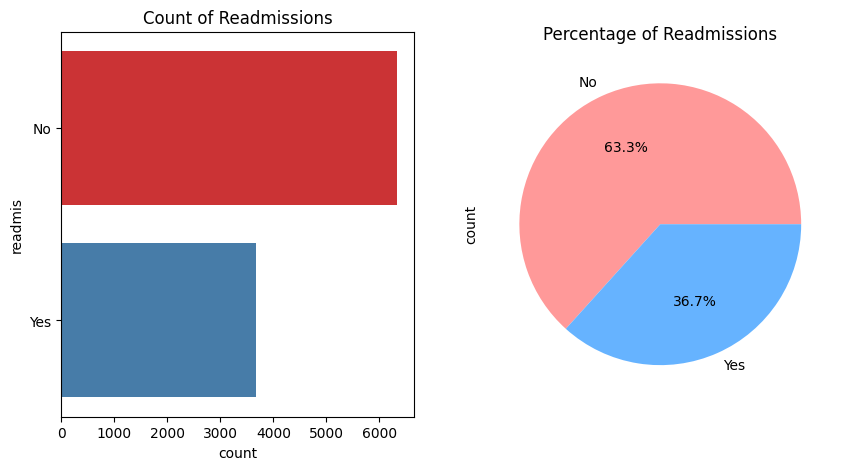

In [14]:
# Display countplot and pie chart for the target variable 'readmis'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(df_reduced['readmis'], palette='Set1')
plt.title('Count of Readmissions')
plt.subplot(1, 2, 2)
df_reduced['readmis'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Readmissions')
plt.show()

The target variable `readmis`, which represents hospital readmissions within a month of initial admission, shows some class imbalance. Given the nature of the situation the data represent, this is understandable and a greater imbalance is the desired outcome. That said, this mild imbalance could lead to a model that performs well on the majority class (No readmission) but struggles to accurately identify the critical minority cases (Yes, readmitted). Given the importance of correctly predicting readmissions, it is important to notice this as we proceed with a logistic model. (Canuma, 2023)

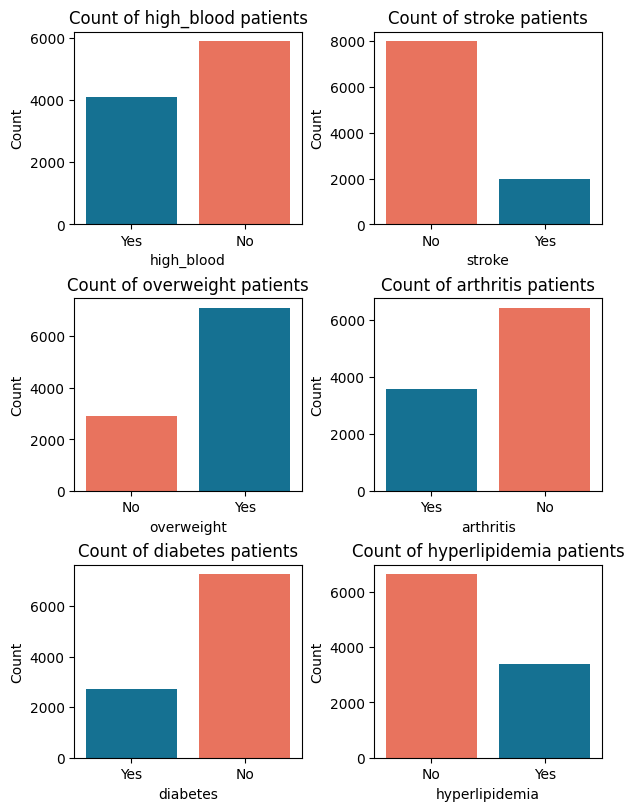

In [15]:
# binary variables
binary_vars1 = ['high_blood', 'stroke', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia']
#color mapping 
color_mapping = {'Yes': "#007ba7", 'No': "#ff6347"}

fig, axes = plt.subplots(3, 2, figsize=(6, 8), constrained_layout=True)
axes = axes.ravel()

for i, var in enumerate(binary_vars1):
    # color mapping for consistency
    sns.countplot(data=df_reduced, x=var, hue=var, ax=axes[i], hue_order=['Yes', 'No'], palette=color_mapping, dodge=False) 
    axes[i].set_title(f'Count of {var} patients')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(var)
    
plt.show()

In [16]:
# proportions of yes no for each variable in binary_vars1 
binary_vars1_proportions = df_reduced[binary_vars1].apply(lambda x: x.value_counts(normalize=True) * 100)
binary_vars1_proportions

,high_blood,stroke,overweight,arthritis,diabetes,hyperlipidemia
No,59.1,80.07,29.06,64.26,72.62,66.28
Yes,40.9,19.93,70.94,35.74,27.38,33.72


- **high_blood**: 59.1% No, 40.9% Yes
- **stroke**: 80.07% No, 19.93% Yes
- **overweight**: 29.06% No, 70.94% Yes
- **arthritis**: 64.26% No, 35.74% Yes
- **diabetes**: 72.62% No, 27.38% Yes
- **hyperlipidemia**: 66.28% No, 33.72% Yes


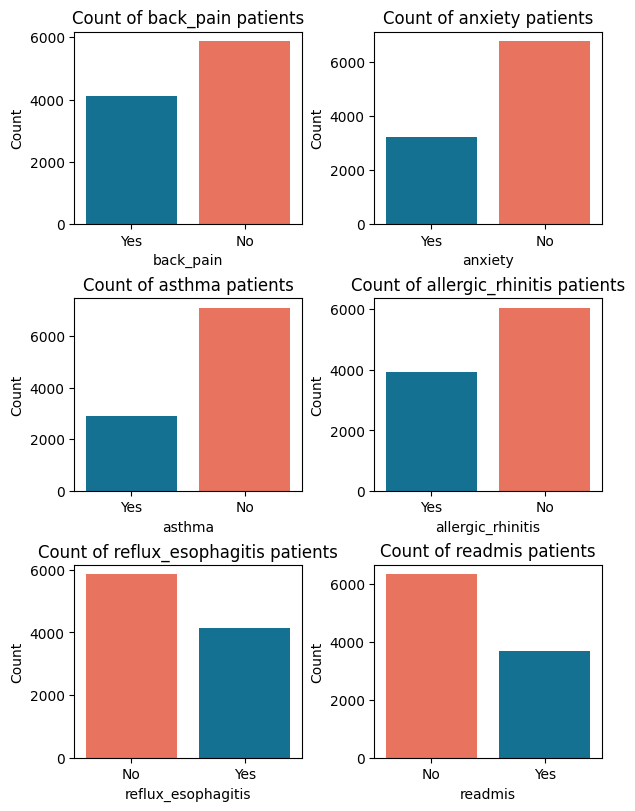

In [17]:
binary_vars2 = ['back_pain', 'anxiety', 'asthma', 'allergic_rhinitis', 'reflux_esophagitis', 'readmis']

#  color mapping 
color_mapping = {'Yes': "#007ba7", 'No': "#ff6347"}

fig, axes = plt.subplots(3, 2, figsize=(6, 8), constrained_layout=True)
axes = axes.ravel()

for i, var in enumerate(binary_vars2):
    # color mapping for consistency
    sns.countplot(data=df_reduced, x=var, hue=var, ax=axes[i], hue_order=['Yes', 'No'], palette=color_mapping, dodge=False) 
    axes[i].set_title(f'Count of {var} patients')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(var)

plt.show()

In [18]:
# proportions of yes no for each variable in binary_vars2 
binary_vars2_proportions = df_reduced[binary_vars2].apply(lambda x: x.value_counts(normalize=True) * 100)
binary_vars2_proportions

,back_pain,anxiety,asthma,allergic_rhinitis,reflux_esophagitis,readmis
No,58.86,67.85,71.07,60.59,58.65,63.31
Yes,41.14,32.15,28.93,39.41,41.35,36.69


- **back_pain**: 58.86% No, 41.14% Yes
- **anxiety**: 67.85% No, 32.15% Yes
- **asthma**: 71.07% No, 28.93% Yes
- **allergic_rhinitis**: 60.59% No, 39.41% Yes
- **reflux_esophagitis**: 58.65% No, 41.35% Yes
- **readmis**: 63.31% No, 36.69% Yes

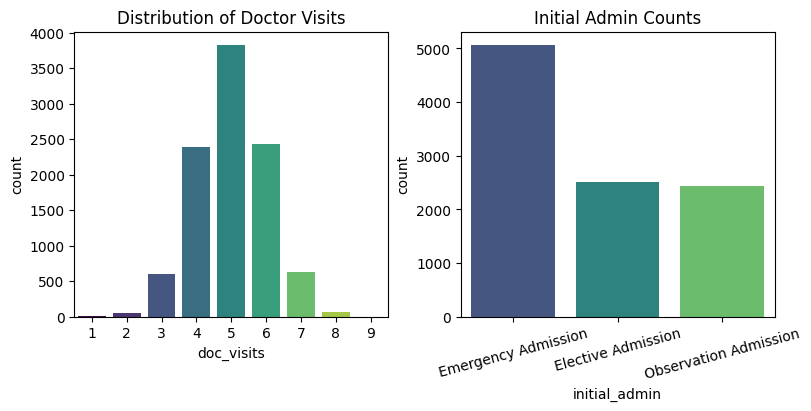

In [19]:
# count plots for doc_visits and initial_admin variables
fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
sns.countplot(data=df_reduced, x='doc_visits', hue='doc_visits', ax=axes[0], palette='viridis', legend=False)
sns.countplot(data=df_reduced, x='initial_admin', hue='initial_admin', ax=axes[1], palette='viridis', legend=False)
#add titles and labels to above plots
axes[0].set_title('Distribution of Doctor Visits')
plt.xticks(rotation=15)
axes[1].set_title('Initial Admin Counts')
plt.show()

-   **Distribution of Doctor Visits:**
Very symmetrical distribution with a peak at 5 visits.

-   **Hospital admissions: Emergency, Elective, and Observation.**
Emergency Admission is the most common, followed by Elective and Observation Admissions, both of which have similar counts, much lower than Emergency Admissions.

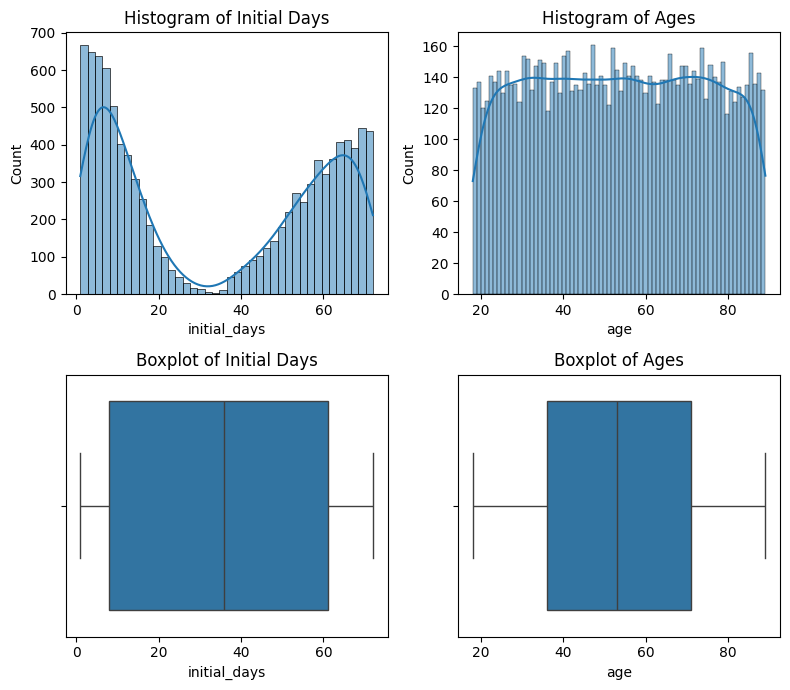

In [20]:
# boxplots
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

# histogram of initial_days
sns.histplot(data=df_reduced, x='initial_days', ax=axes[0,0], kde=True, bins=40)
axes[0,0].set_title('Histogram of Initial Days')

# histogram of age
sns.histplot(data=df_reduced, x='age', ax=axes[0,1], kde=True, bins=72)
axes[0,1].set_title('Histogram of Ages')

# boxplot of initial_days
sns.boxplot(data=df_reduced, x='initial_days', ax=axes[1,0])
axes[1,0].set_title('Boxplot of Initial Days')

# boxplot of age
sns.boxplot(data=df_reduced, x='age', ax=axes[1,1])
axes[1,1].set_title('Boxplot of Ages')

plt.tight_layout()
plt.show()

- The distribution of `initial_days` has two peaks (bimodal distribution), suggesting two groups or patterns in the initial days' data that may be related to different patient populations or conditions.

- The distribution of `age` is relatively uniform. This suggests that the age distribution is relatively balanced and does not exhibit strong skewness or outliers.

- The boxplots suggest no significant outliers.

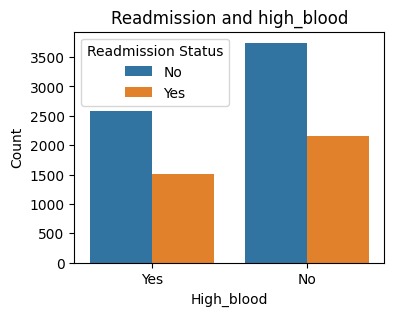

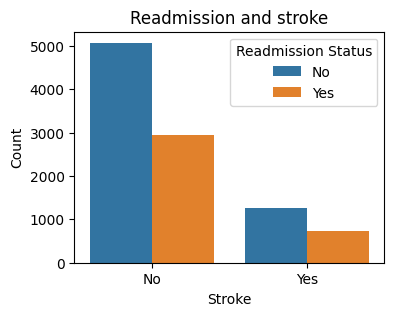

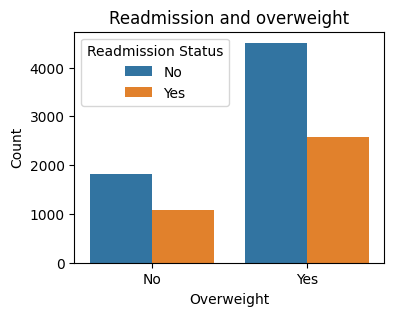

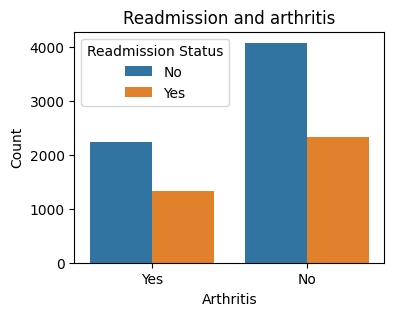

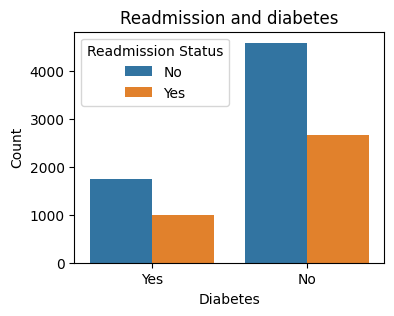

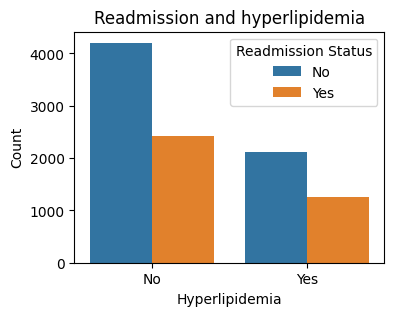

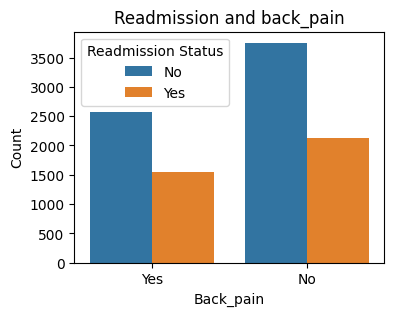

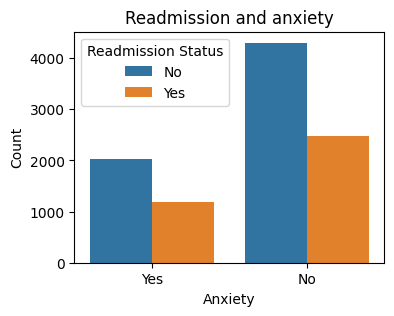

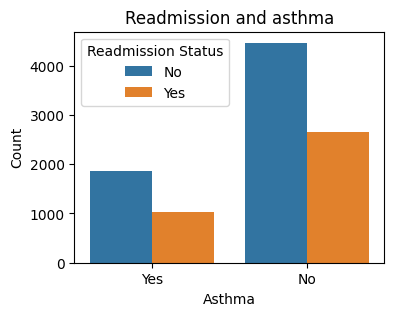

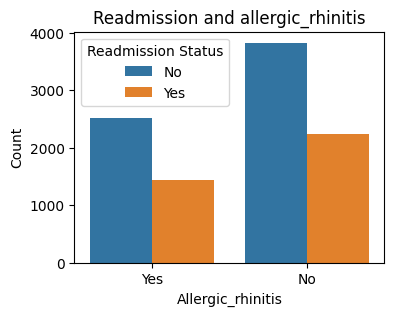

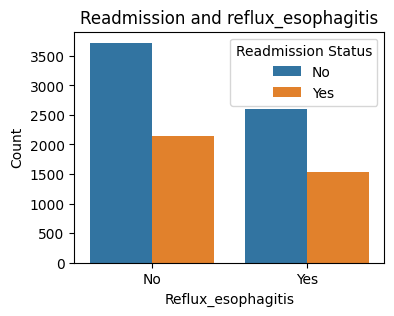

In [21]:
# Visualize the relationship between 'readmis' and binary variables 
binary_variables = ['high_blood', 'stroke', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'asthma', 'allergic_rhinitis', 'reflux_esophagitis']

for var in binary_variables:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=var, hue='readmis', data=df_reduced)
    plt.title(f'Readmission and {var}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Readmission Status')
    plt.show()

- Overall we see general similar relationships between the dependent variable and the binary independent variables. This will be better assesed in the model building phase.

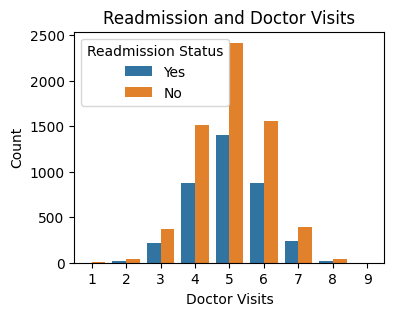

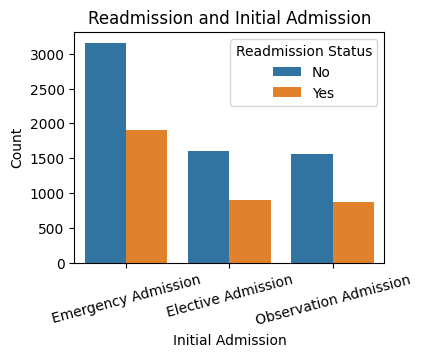

In [22]:
# Visualize the relationship between 'readmis' and discrete variables ('doc_visits', 'initial_admin')

#  doc_visits
plt.figure(figsize=(4, 3))
sns.countplot(x='doc_visits', hue='readmis', data=df_reduced)
plt.title('Readmission and Doctor Visits')
plt.xlabel('Doctor Visits')
plt.ylabel('Count')
plt.legend(title='Readmission Status')
plt.show()

# 'initial_admin
plt.figure(figsize=(4, 3))
sns.countplot(x='initial_admin', hue='readmis', data=df_reduced, order=df_reduced['initial_admin'].value_counts().index)
plt.title('Readmission and Initial Admission')
plt.xlabel('Initial Admission')
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.legend(title='Readmission Status')
plt.show()


- Both may be predictors, but the relationship seems rather uniform across between the catagories, with no clear stand out patterns.

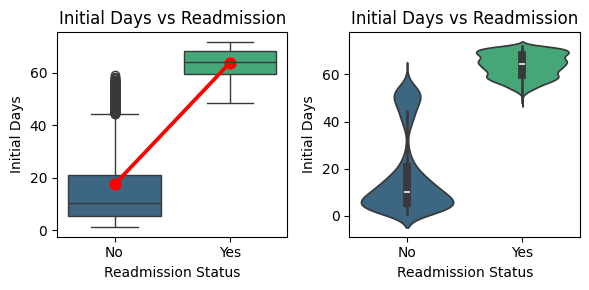

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Boxplot for ReAdmis and Initial_days
sns.boxplot(data=df_reduced, x='readmis', y='initial_days', ax=axes[0], palette='viridis', hue='readmis', legend=False)
sns.pointplot(data=df_reduced, x='readmis', y='initial_days', color='red', estimator=np.mean, errorbar=None, ax=axes[0])
axes[0].set_title('Initial Days vs Readmission')
axes[0].set_xlabel('Readmission Status')
axes[0].set_ylabel('Initial Days')

# readmis and initial_days in a violin plot
sns.violinplot(data=df_reduced, x='readmis', y='initial_days', ax=axes[1], palette='viridis', hue='readmis', legend=False)
axes[1].set_title('Initial Days vs Readmission')
axes[1].set_xlabel('Readmission Status')
axes[1].set_ylabel('Initial Days')


plt.tight_layout()
plt.show()

Boxplot (left side): The boxplot for 'No' readmissions has a lower median of initial days than for 'Yes' readmissions, indicated by the red dots which are presumably the median values. Additionally, the 'Yes' readmission boxplot indicates a higher range of initial days (with a larger interquartile range), suggesting that patients with more initial days tend to have a higher chance of readmission. There are also outliers for the 'No' readmission status.

Violin Plot (right side): The 'No' readmission status has a more tapered distribution, suggesting that most patients have a shorter initial stay. The thicker section of the 'Yes' violin plot suggests a higher density around the median compared to the 'No' category.

The red line with two dots represents the mean comparison between the two categories, emphasizing the difference in central tendency for initial days between patients with and without readmissions. 

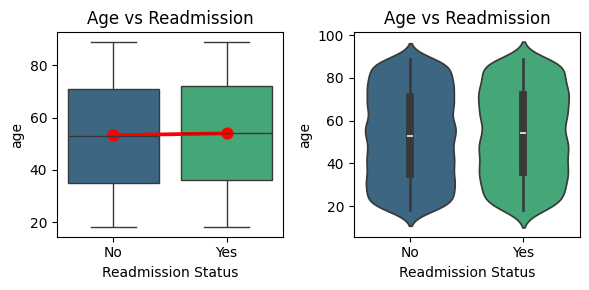

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Boxplot for ReAdmis and age
sns.boxplot(data=df_reduced, x='readmis', y='age', ax=axes[0], palette='viridis', hue='readmis', legend=False)
sns.pointplot(data=df_reduced, x='readmis', y='age', color='red', estimator=np.mean, errorbar=None, ax=axes[0])
axes[0].set_title('Age vs Readmission')
axes[0].set_xlabel('Readmission Status')
axes[0].set_ylabel('age')

# readmis and age in a violin plot
sns.violinplot(data=df_reduced, x='readmis', y='age', ax=axes[1], palette='viridis', hue='readmis', legend=False)
axes[1].set_title('Age vs Readmission')
axes[1].set_xlabel('Readmission Status')
axes[1].set_ylabel('age')

plt.tight_layout()
plt.show()

conversely, the boxplot and violin plot for age suggest no significant relationship between age and readmission status.But that is not conclusive without further analysis.

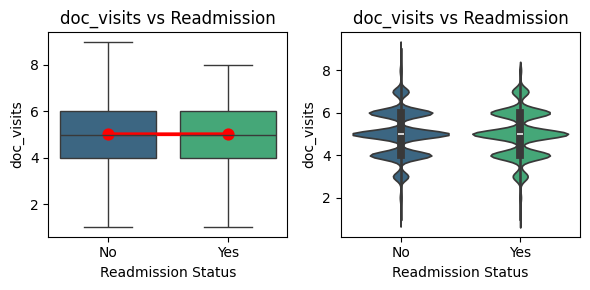

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Boxplot for ReAdmis and doc_visits
sns.boxplot(data=df_reduced, x='readmis', y='doc_visits', ax=axes[0], palette='viridis', hue='readmis', legend=False)
sns.pointplot(data=df_reduced, x='readmis', y='doc_visits', color='red', estimator=np.mean, errorbar=None, ax=axes[0])
axes[0].set_title('doc_visits vs Readmission')
axes[0].set_xlabel('Readmission Status')
axes[0].set_ylabel('doc_visits')

# readmis and doc_visits in a violin plot
sns.violinplot(data=df_reduced, x='readmis', y='doc_visits', ax=axes[1], palette='viridis', hue='readmis', legend=False)
axes[1].set_title('doc_visits vs Readmission')
axes[1].set_xlabel('Readmission Status')
axes[1].set_ylabel('doc_visits')

plt.tight_layout()
plt.show()

-------------------------------------------

In [26]:
df_reduced = pd.read_csv('df_reduced.csv', index_col=0)

## Part III - Data Prep, continued

- One-hot encoding is a process that re-expresses categorical variables as binary variables, creating dummy variables for each category within a categorical variable, to make them usable in a regression model. The Pandas library provides the pd.get_dummies() function to perform this transformation, creating a new binary column for each category, with 1 indicating the presence and 0 indicating the absence of that category, and the original categorical variable is then dropped from the dataset to avoid multicollinearity issues.

- Ordinal and binary variables *(Yes/No->1/0)* will be re-expressed as well using pythons `replace` method. 

In [28]:
# Lets convert
# select and show values counts for binary variables to compare berfore and after reexpression 
binary_vars = [col for col in df_reduced.columns if df_reduced[col].isin(['Yes', 'No']).all()]
for col in binary_vars:
    print(df_reduced[col].value_counts())

readmis
No     6331
Yes    3669
Name: count, dtype: int64
high_blood
No     5910
Yes    4090
Name: count, dtype: int64
stroke
No     8007
Yes    1993
Name: count, dtype: int64
overweight
Yes    7094
No     2906
Name: count, dtype: int64
arthritis
No     6426
Yes    3574
Name: count, dtype: int64
diabetes
No     7262
Yes    2738
Name: count, dtype: int64
hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64
back_pain
No     5886
Yes    4114
Name: count, dtype: int64
anxiety
No     6785
Yes    3215
Name: count, dtype: int64
allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64
reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64
asthma
No     7107
Yes    2893
Name: count, dtype: int64


In [29]:
# re-expression of binary variables
df_reduced[binary_vars] = df_reduced[binary_vars].replace({'Yes': 1, 'No': 0})

# check the unique values for the binary variables
for col in binary_vars:
    print(df_reduced[col].value_counts())

readmis
0    6331
1    3669
Name: count, dtype: int64
high_blood
0    5910
1    4090
Name: count, dtype: int64
stroke
0    8007
1    1993
Name: count, dtype: int64
overweight
1    7094
0    2906
Name: count, dtype: int64
arthritis
0    6426
1    3574
Name: count, dtype: int64
diabetes
0    7262
1    2738
Name: count, dtype: int64
hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64
back_pain
0    5886
1    4114
Name: count, dtype: int64
anxiety
0    6785
1    3215
Name: count, dtype: int64
allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64
reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64
asthma
0    7107
1    2893
Name: count, dtype: int64


C:\Users\hinde\AppData\Local\Temp\ipykernel_13240\638310301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reduced[binary_vars] = df_reduced[binary_vars].replace({'Yes': 1, 'No': 0})



-   To avoid introducing multicollinearity, it's common practice to drop one of the binary variables from each encoded category. Which will be done with the optional argument `drop_first=True` in the `pd.get_dummies` method.

In [30]:
# Using get_dummies to convert 'initial_admin' to 1 and 0 for one-hot encoding and drop the first column to avoid multicollinearity.
nominal_vars = ['initial_admin']
df_encoded = pd.get_dummies(df_reduced, columns=nominal_vars, dtype=int, drop_first=True)

In [31]:
# Show the head of the encoded DataFrame
pd.set_option('display.max_columns', None)
df_encoded

,age,readmis,doc_visits,high_blood,stroke,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,initial_days,initial_admin_Emergency Admission,initial_admin_Observation Admission
0,53,0,6,1,0,0,1,1,0,1,1,1,0,1,10.59,1,0
1,51,0,4,1,0,1,0,0,0,0,0,0,1,0,15.13,1,0
2,53,0,4,1,0,1,0,1,0,0,0,0,0,0,4.77,0,0
3,78,0,4,0,1,0,1,0,0,0,0,0,1,1,1.71,0,0
4,22,0,5,0,0,0,0,0,1,0,0,1,0,0,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,0,4,1,0,0,0,0,0,0,1,0,1,0,51.56,1,0
9996,87,1,5,1,0,1,1,1,0,0,0,0,0,1,68.67,0,0
9997,45,1,4,1,0,1,0,0,0,0,1,1,0,0,70.15,0,0
9998,43,1,5,0,0,1,0,0,0,1,0,0,0,0,63.36,1,0


In [32]:
#FINAL CLEAN TRANSFORMED CSV
df_encoded.to_csv('medical_logistic.csv', index=False)

-----------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


# Part IV: Model Building and Evaluation
- With our cleaned and transformed data, we are now ready to use our chosen explanatory variables to build an initial logistic regression model.

### Reference of Important Logistic Regression Concepts used:

**Probability (p)**
- Probability is a way to measure how likely something is to happen. If we're looking at events, the probability tells us how often one specific event happens out of all possibilities:
  $$p = \frac{\text{Number of times the event happens}}{\text{Total events observed}}$$

**Odds:**
- Odds tell us how the chances of something happening compare to it not happening. It's like comparing the likelihood of rain to sunshine based on the weather forecast:
  $$\text{Odds} = \frac{\text{Chance of happening}}{\text{Chance of not happening}} = \frac{p}{(1 - p)}$$

**The Logistic Function: Turning Numbers into Probabilities:**
- This function takes our data and transforms it into a probability (a number between 0 and 1), showing us how likely something is:
  $$p(x) = \frac{1}{(1 + e^{-x})}$$
  Here, \(e\) is a mathematical constant, and \(x\) represents our data.

**The Logit Function:**
- The logit function takes probability and converts it into useful format for analysis, helping understand the relationship between data and predicting:
  $$\text{logit}(p) = \log\left(\frac{p}{(1 - p)}\right)$$

**Making Predictions with Multiple Data:**
- Logistic regression allows us to combine:
  $$\text{logit}(p) = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n$$
  Each piece of information (\(x_1, x_2, \ldots, x_n\)) has its importance (\(b_1, b_2, \ldots, b_n\)) in predicting the outcome.

**Odds Ratio (OR): Comparing Scenarios:**
- Odds ratio helps  understand how the odds of an outcome change with different information or in different conditions showing us change in odds when the information (\(x\)) changes:
  $$\text{OR} = e^b$$
  A higher odds ratio means a greater likelihood of the event happening under the condition being examined.



In [33]:
# Import the CLEAN TX'D data into a DataFrame
medical_df = pd.read_csv('medical_logistic.csv')
print(medical_df .shape)
medical_df.head().transpose()

(10000, 17)


,0,1,2,3,4
age,53.00,51.00,53.00,78.00,22.00
readmis,0.00,0.00,0.00,0.00,0.00
doc_visits,6.00,4.00,4.00,4.00,5.00
high_blood,1.00,1.00,1.00,0.00,0.00
stroke,0.00,0.00,0.00,1.00,0.00
overweight,0.00,1.00,1.00,0.00,0.00
arthritis,1.00,0.00,0.00,1.00,0.00
diabetes,1.00,0.00,1.00,0.00,0.00
hyperlipidemia,0.00,0.00,0.00,0.00,1.00
back_pain,1.00,0.00,0.00,0.00,0.00


> model creation:

In [34]:
#define dependent variable 'readmis' and the independent variables
y_initial = medical_df['readmis']
X_initial = medical_df.drop(['readmis'], axis=1)
X_initial = sm.add_constant(X_initial)  # addsa constant to the model

# build  initial logistic regression model using statsmodels
initial_model = sm.Logit(y_initial, X_initial)
initial_result = initial_model.fit()

# summary of the initial logistic regression model
model_summary = initial_result.summary()

#print aic
aic = initial_result.aic
print('AIC:', aic)
model_summary

Optimization terminated successfully.
         Current function value: 0.037897
         Iterations 14
AIC: 791.9312879411568


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9423
Time:                        08:56:21   Log-Likelihood:                -378.97
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -71.2947      3.764    -18.941      0.000     -78.672     -63.917
age                                     0.0006      0.005      0.126      0.900      -0.008       0.009
doc_visits                              0.0026      0.089      0.029      0.976      -0.171       0.176
high_blood                              0.8649      0.200      4.322      0.000       0.473       1.257
stroke                                  1.5278      0.246      6.204      0.000       1.045       2.010
overweight                             -0.2335      0.210     -1.110      0.267      -0.646       0.179
arthritis                              -1.1347      0.205     -5.533      0.000      -1.537      -0.733
diabetes                                0.4180      0.212      1.975      0.048       0.003       0.833
hyperlipidemia                          0.3335      0.200      1.666      0.096      -0.059       0.726
back_pain                               0.3115      0.191      1.635      0.102      -0.062       0.685
anxiety                                -0.9175      0.207     -4.431      0.000      -1.323      -0.512
allergic_rhinitis                      -0.3392      0.194     -1.750      0.080      -0.719       0.041
reflux_esophagitis                     -0.3305      0.194     -1.707      0.088      -0.710       0.049
asthma                                 -1.1540      0.214     -5.387      0.000      -1.574      -0.734
initial_days                            1.2982      0.068     19.032      0.000       1.165       1.432
initial_admin_Emergency Admission       2.1194      0.248      8.533      0.000       1.633       2.606
initial_admin_Observation Admission     0.6305      0.262      2.410      0.016       0.118       1.143
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""


### Some notable summary points:
-   The model has a `constant` and 16 predictors.
-   The Pseudo R-squared value is `0.9423`. We will note this value in the reduced model.
-   The `AIC` value is 791.931. We will note this value in the reduced the model.
-   The `constant` term has a negative coefficient `-71.2947` and is significant (p <= 0.000).
-   Features such as `high_blood`, `stroke`, `diabetes`, `initial_days`, `initial_admin_Observation Admission` and `initial_admin_Emergency Admission` have positive coefficients and are statistically significant (p < 0.05).
-   Features like `arthritis`, `anxiety`, and `asthma` have negative coefficients and are also statistically significant (p < 0.05).

- **Note**, the following message returned in the summary will be monitored as we proceed with feature selection: *Possibly complete quasi-separation: A fraction 0.80 of observations can be perfectly predicted. This might indicate that there is complete quasi-separation. In this case some parameters will not be identified.*

> Next, a check for multicollinearity will be performed using the Variance Inflation Factor (VIF):

In [35]:
# calculate the variance inflation factor (VIF) for each independent variable
vif = pd.DataFrame()
vif['Features'] = X_initial.columns
vif['VIF'] = [variance_inflation_factor(X_initial.values, i) for i in range(X_initial.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,42.592009
16,initial_admin_Observation Admission,1.494880
15,initial_admin_Emergency Admission,1.494190
9,back_pain,1.002232
2,doc_visits,1.002160
8,hyperlipidemia,1.002011
1,age,1.001972
5,overweight,1.001833
6,arthritis,1.001813
14,initial_days,1.001779


-    ####  VIF scores of  initial predictor variables suggest no significant multicollinearity issues. The VIF scores are all below 5.

>  ### Part IV - 2  Justify a statically based feature selection procedure or a model evaluation metric to reduce the inial model in a way that aligns with the research question. 

For feature selection process, the methodical approach used will based on the statistical significance of each independent variable, indicated by their p-values. P-values in this context measure the probability that an observed effect occurs by chance under the null hypothesis, which assumes that a given independent variable has no impact on the dependent variable (readmission status). A p-value below 0.05 suggests a less than 5% chance that the relationship is coincidental, suggesting that we should keep the variable for its potential explanatory power.

Using a backward elimination technique, the plan is to remove one variable at a time, starting with the one having the highest p-value (least statistically significant). After each removal, the model will be recalculated to evaluate the changes in the relationships between the remaining varbiles. This will continue until all remaining features in the model have p-values below the chosen significance level of 0.05 (Straw, 2023).

To evaluate the overall statistical measure of the initial model to the reduced model, we will note adn then compare the model Accuracy, Pseudo R-squared and AIC values. By comparing these values between the initial and reduced models, we can assess the impact of feature selection on the model's performance and statistical significance.

In [36]:
# model's results and identify variables with p-values >= 0.05
p_values = initial_result.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')

# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
doc_visits,0.976495
age,0.900014
overweight,0.266830
back_pain,0.102065
hyperlipidemia,0.095696
reflux_esophagitis,0.087829
allergic_rhinitis,0.080154


> ### Drop `doc_visits` given highest current p-value

In [37]:
# drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.037897
         Iterations 14
AIC: 789.932155992506


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9423
Time:                        08:56:22   Log-Likelihood:                -378.97
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -71.2822      3.739    -19.062      0.000     -78.611     -63.953
age                                     0.0006      0.005      0.125      0.900      -0.008       0.009
high_blood                              0.8653      0.200      4.336      0.000       0.474       1.256
stroke                                  1.5276      0.246      6.205      0.000       1.045       2.010
overweight                             -0.2335      0.210     -1.110      0.267      -0.646       0.179
arthritis                              -1.1344      0.205     -5.539      0.000      -1.536      -0.733
diabetes                                0.4184      0.211      1.981      0.048       0.004       0.832
hyperlipidemia                          0.3332      0.200      1.667      0.096      -0.059       0.725
back_pain                               0.3117      0.190      1.637      0.102      -0.061       0.685
anxiety                                -0.9176      0.207     -4.432      0.000      -1.323      -0.512
allergic_rhinitis                      -0.3388      0.193     -1.753      0.080      -0.718       0.040
reflux_esophagitis                     -0.3305      0.194     -1.707      0.088      -0.710       0.049
asthma                                 -1.1540      0.214     -5.387      0.000      -1.574      -0.734
initial_days                            1.2982      0.068     19.033      0.000       1.165       1.432
initial_admin_Emergency Admission       2.1197      0.248      8.540      0.000       1.633       2.606
initial_admin_Observation Admission     0.6309      0.261      2.413      0.016       0.118       1.143
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
age,0.900399
overweight,0.266853
back_pain,0.101571
hyperlipidemia,0.095557
reflux_esophagitis,0.087864
allergic_rhinitis,0.079669


> ### Drop `age` given highest current p-value

In [39]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits', 'age'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.037897
         Iterations 14
AIC: 787.9478195467841


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9423
Time:                        08:56:22   Log-Likelihood:                -378.97
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -71.2762      3.740    -19.057      0.000     -78.607     -63.946
high_blood                              0.8659      0.199      4.341      0.000       0.475       1.257
stroke                                  1.5280      0.246      6.205      0.000       1.045       2.011
overweight                             -0.2338      0.210     -1.112      0.266      -0.646       0.178
arthritis                              -1.1339      0.205     -5.538      0.000      -1.535      -0.733
diabetes                                0.4162      0.210      1.978      0.048       0.004       0.829
hyperlipidemia                          0.3331      0.200      1.666      0.096      -0.059       0.725
back_pain                               0.3118      0.190      1.638      0.101      -0.061       0.685
anxiety                                -0.9167      0.207     -4.431      0.000      -1.322      -0.511
allergic_rhinitis                      -0.3390      0.193     -1.754      0.079      -0.718       0.040
reflux_esophagitis                     -0.3328      0.193     -1.728      0.084      -0.710       0.045
asthma                                 -1.1541      0.214     -5.387      0.000      -1.574      -0.734
initial_days                            1.2987      0.068     19.057      0.000       1.165       1.432
initial_admin_Emergency Admission       2.1193      0.248      8.540      0.000       1.633       2.606
initial_admin_Observation Admission     0.6315      0.261      2.417      0.016       0.119       1.144
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [40]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
overweight,0.266240
back_pain,0.101496
hyperlipidemia,0.095667
reflux_esophagitis,0.084064
allergic_rhinitis,0.079416


> ### Drop `overweight` given highest current p-value

In [41]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits', 'age', 'overweight'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.037959
         Iterations 14
AIC: 787.1890737536384


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9422
Time:                        08:56:22   Log-Likelihood:                -379.59
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -71.1523      3.726    -19.097      0.000     -78.455     -63.850
high_blood                              0.8491      0.199      4.276      0.000       0.460       1.238
stroke                                  1.5283      0.246      6.209      0.000       1.046       2.011
arthritis                              -1.1427      0.204     -5.588      0.000      -1.543      -0.742
diabetes                                0.4230      0.210      2.014      0.044       0.011       0.835
hyperlipidemia                          0.3293      0.200      1.649      0.099      -0.062       0.721
back_pain                               0.3160      0.190      1.661      0.097      -0.057       0.689
anxiety                                -0.9143      0.207     -4.422      0.000      -1.320      -0.509
allergic_rhinitis                      -0.3279      0.193     -1.700      0.089      -0.706       0.050
reflux_esophagitis                     -0.3213      0.192     -1.673      0.094      -0.698       0.055
asthma                                 -1.1540      0.214     -5.393      0.000      -1.573      -0.735
initial_days                            1.2934      0.068     19.118      0.000       1.161       1.426
initial_admin_Emergency Admission       2.1061      0.248      8.505      0.000       1.621       2.592
initial_admin_Observation Admission     0.6220      0.261      2.380      0.017       0.110       1.134
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [42]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
hyperlipidemia,0.099125
back_pain,0.096697
reflux_esophagitis,0.094413
allergic_rhinitis,0.089089


> ### Drop `hyperlipidemia` given highest current p-value

In [43]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits', 'age', 'overweight', 'hyperlipidemia'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.038096
         Iterations 14
AIC: 787.9272739837377


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9420
Time:                        08:56:22   Log-Likelihood:                -380.96
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -70.8463      3.706    -19.115      0.000     -78.111     -63.582
high_blood                              0.8516      0.198      4.298      0.000       0.463       1.240
stroke                                  1.5079      0.245      6.159      0.000       1.028       1.988
arthritis                              -1.1348      0.204     -5.562      0.000      -1.535      -0.735
diabetes                                0.4079      0.209      1.949      0.051      -0.002       0.818
back_pain                               0.3182      0.190      1.676      0.094      -0.054       0.690
anxiety                                -0.9208      0.206     -4.459      0.000      -1.326      -0.516
allergic_rhinitis                      -0.3437      0.192     -1.789      0.074      -0.720       0.033
reflux_esophagitis                     -0.3314      0.192     -1.728      0.084      -0.707       0.045
asthma                                 -1.1560      0.214     -5.401      0.000      -1.575      -0.736
initial_days                            1.2899      0.067     19.135      0.000       1.158       1.422
initial_admin_Emergency Admission       2.1176      0.247      8.569      0.000       1.633       2.602
initial_admin_Observation Admission     0.6361      0.260      2.444      0.015       0.126       1.146
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [44]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
back_pain,0.093807
reflux_esophagitis,0.084049
allergic_rhinitis,0.073604
diabetes,0.051346


> ### Drop `back_pain` given highest current p-value

In [45]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits', 'age', 'overweight', 'hyperlipidemia', 'back_pain'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.038238
         Iterations 14
AIC: 788.7523309907285


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9418
Time:                        08:56:22   Log-Likelihood:                -382.38
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -70.4368      3.676    -19.161      0.000     -77.642     -63.232
high_blood                              0.8558      0.198      4.327      0.000       0.468       1.243
stroke                                  1.4917      0.244      6.106      0.000       1.013       1.971
arthritis                              -1.1353      0.204     -5.577      0.000      -1.534      -0.736
diabetes                                0.4077      0.210      1.943      0.052      -0.004       0.819
anxiety                                -0.8835      0.204     -4.327      0.000      -1.284      -0.483
allergic_rhinitis                      -0.3271      0.191     -1.711      0.087      -0.702       0.048
reflux_esophagitis                     -0.3290      0.191     -1.718      0.086      -0.704       0.046
asthma                                 -1.1547      0.214     -5.406      0.000      -1.573      -0.736
initial_days                            1.2844      0.067     19.183      0.000       1.153       1.416
initial_admin_Emergency Admission       2.1218      0.246      8.609      0.000       1.639       2.605
initial_admin_Observation Admission     0.6481      0.260      2.497      0.013       0.139       1.157
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [46]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
allergic_rhinitis,0.087047
reflux_esophagitis,0.085736
diabetes,0.052033


> ### Drop `allergic_rhinitis` given highest current p-value

In [47]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits', 'age', 'overweight', 'hyperlipidemia', 'back_pain', 'allergic_rhinitis'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.038385
         Iterations 14
AIC: 789.6969608045024


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9416
Time:                        08:56:22   Log-Likelihood:                -383.85
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -70.1221      3.633    -19.304      0.000     -77.242     -63.002
high_blood                              0.8524      0.197      4.320      0.000       0.466       1.239
stroke                                  1.4835      0.244      6.074      0.000       1.005       1.962
arthritis                              -1.1305      0.203     -5.559      0.000      -1.529      -0.732
diabetes                                0.4023      0.210      1.920      0.055      -0.008       0.813
anxiety                                -0.8611      0.203     -4.248      0.000      -1.258      -0.464
reflux_esophagitis                     -0.3104      0.191     -1.626      0.104      -0.685       0.064
asthma                                 -1.1429      0.213     -5.377      0.000      -1.559      -0.726
initial_days                            1.2762      0.066     19.337      0.000       1.147       1.406
initial_admin_Emergency Admission       2.1032      0.245      8.570      0.000       1.622       2.584
initial_admin_Observation Admission     0.6436      0.259      2.482      0.013       0.135       1.152
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [48]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order


if insignificant_variables.empty == True:
    print('There are no insignificant variables left in the model')
insignificant_variables



,P-Value
reflux_esophagitis,0.103908
diabetes,0.054834


> ### Drop `reflux_esophagitis` given highest current p-value

In [49]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y = medical_df['readmis']
X = medical_df.drop(['readmis', 'doc_visits', 'age', 'overweight', 'hyperlipidemia', 'back_pain', 'allergic_rhinitis', 'reflux_esophagitis'], axis=1)
X = sm.add_constant(X)  # addsa constant to the model

# iterate logistic regression model using statsmodels
iterate_results = sm.Logit(y, X)
iterate_results = iterate_results.fit()

# summary of the iterate logistic regression model
iterate_summary = iterate_results.summary()
#print aic
aic = iterate_results.aic
print('AIC:', aic)
iterate_summary


Optimization terminated successfully.
         Current function value: 0.038518
         Iterations 14
AIC: 790.353229464995


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9414
Time:                        08:56:22   Log-Likelihood:                -385.18
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -69.9802      3.616    -19.352      0.000     -77.068     -62.893
high_blood                              0.8529      0.197      4.332      0.000       0.467       1.239
stroke                                  1.4728      0.243      6.056      0.000       0.996       1.950
arthritis                              -1.1219      0.203     -5.532      0.000      -1.519      -0.724
diabetes                                0.4222      0.209      2.017      0.044       0.012       0.833
anxiety                                -0.8497      0.202     -4.201      0.000      -1.246      -0.453
asthma                                 -1.1260      0.211     -5.330      0.000      -1.540      -0.712
initial_days                            1.2713      0.066     19.384      0.000       1.143       1.400
initial_admin_Emergency Admission       2.0790      0.244      8.508      0.000       1.600       2.558
initial_admin_Observation Admission     0.6325      0.259      2.441      0.015       0.125       1.140
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [50]:
# model's results and identify variables with p-values >= 0.05
p_values = iterate_results.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order

if insignificant_variables.empty == True:
    print('There are no insignificant variables left in the model')
insignificant_variables

There are no insignificant variables left in the model


,P-Value


> ### All remaining features are significant according to their p-values, which are less than the 0.05 threshold.

> ## E.  Analyze the data set using your reduced logisc regression mode

> #### There are no more insignificant variables to drop according to the p-values. The final model will be built with the remaining variables, and assigned new variable names to distinguish from the initial model. We will then compare the `Initial_Model` to the `Reduced_Model`.

In [51]:
# Drop the most insignificant feature from the model according to the p-values
# rerun the model and check the results
y_reduced = medical_df['readmis']
X_reduced = medical_df.drop(['readmis', 'doc_visits', 'age', 'overweight', 'hyperlipidemia', 'back_pain', 'allergic_rhinitis', 'reflux_esophagitis'], axis=1)
X_reduced = sm.add_constant(X_reduced)  # addsa constant to the model

# iterate logistic regression model using statsmodels
reduced_results = sm.Logit(y_reduced, X_reduced)
reduced_results = reduced_results.fit()

# summary of the iterate logistic regression model
reduced_summary = reduced_results.summary()
#print aic
aic = reduced_results.aic
print('AIC:', aic)
reduced_summary


Optimization terminated successfully.
         Current function value: 0.038518
         Iterations 14
AIC: 790.353229464995


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                readmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.9414
Time:                        08:56:22   Log-Likelihood:                -385.18
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -69.9802      3.616    -19.352      0.000     -77.068     -62.893
high_blood                              0.8529      0.197      4.332      0.000       0.467       1.239
stroke                                  1.4728      0.243      6.056      0.000       0.996       1.950
arthritis                              -1.1219      0.203     -5.532      0.000      -1.519      -0.724
diabetes                                0.4222      0.209      2.017      0.044       0.012       0.833
anxiety                                -0.8497      0.202     -4.201      0.000      -1.246      -0.453
asthma                                 -1.1260      0.211     -5.330      0.000      -1.540      -0.712
initial_days                            1.2713      0.066     19.384      0.000       1.143       1.400
initial_admin_Emergency Admission       2.0790      0.244      8.508      0.000       1.600       2.558
initial_admin_Observation Admission     0.6325      0.259      2.441      0.015       0.125       1.140
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

> #### Here, we will create a confusion matrix and calculate the accuracy of the initial model and the reduced model using True Negative (TN), False Positive (FP), False Negative (FN), and True Positive (TP) values from the matric results:
- $(TP + TN)/(TP + TN + FP + FN)$.

In [52]:
# INITIAL MATRIX using a threshold of 0.5 predicted class
y_pred_prob_i = initial_result.predict(X_initial)
y_pred_i = np.where(y_pred_prob_i > 0.5, 1, 0)

#Createconfusion matrix manually for clarity
true_positive_i = np.sum((y_initial == 1) & (y_pred_i == 1))
true_negative_i = np.sum((y_initial == 0) & (y_pred_i == 0))
false_positive_i = np.sum((y_initial == 0) & (y_pred_i == 1))
false_negative_i = np.sum((y_initial == 1) & (y_pred_i == 0))

conf_matrix_i = pd.DataFrame(
    [[true_negative_i, false_negative_i],
     [false_positive_i, true_positive_i]],
    index=['Predicted 0', 'Predicted 1'],
    columns=['Actual 0','Actual 1'])

# calculate accuracy as well
accuracy_i = (true_positive_i + true_negative_i) / len(y_initial)
print('Confusion Matrix Initial Model:\n', conf_matrix_i)
print('\nAccuracy Inital Model:', accuracy_i)

Confusion Matrix Initial Model:
              Actual 0  Actual 1
Predicted 0      6247        75
Predicted 1        84      3594

Accuracy Inital Model: 0.9841


In [53]:
# REDUCEED MATRIX using a threshold of 0.5 predicted class
y_pred_prob_r = reduced_results.predict(X_reduced)
y_pred_r = np.where(y_pred_prob_r > 0.5, 1, 0)

#Create  confusion matrix manually for clarity
true_positive_r = np.sum((y_reduced == 1) & (y_pred_r == 1))
true_negative_r = np.sum((y_reduced == 0) & (y_pred_r == 0))
false_positive_r = np.sum((y_reduced == 0) & (y_pred_r == 1))
false_negative_r = np.sum((y_reduced == 1) & (y_pred_r == 0))

conf_matrix_r = pd.DataFrame(
    [[true_negative_r, false_negative_r],
     [false_positive_r, true_positive_r]],
    index=['Predicted 0', 'Predicted 1'],
    columns=['Actual 0','Actual 1'])

# calculate accuracy as well
accuracy_r = (true_positive_r + true_negative_r) / len(y_reduced)
print('Confusion Matrix reduced Model:\n', conf_matrix_r)
print('\nAccuracy Reduced Model:', accuracy_r)

Confusion Matrix reduced Model:
              Actual 0  Actual 1
Predicted 0      6250        75
Predicted 1        81      3594

Accuracy Reduced Model: 0.9844


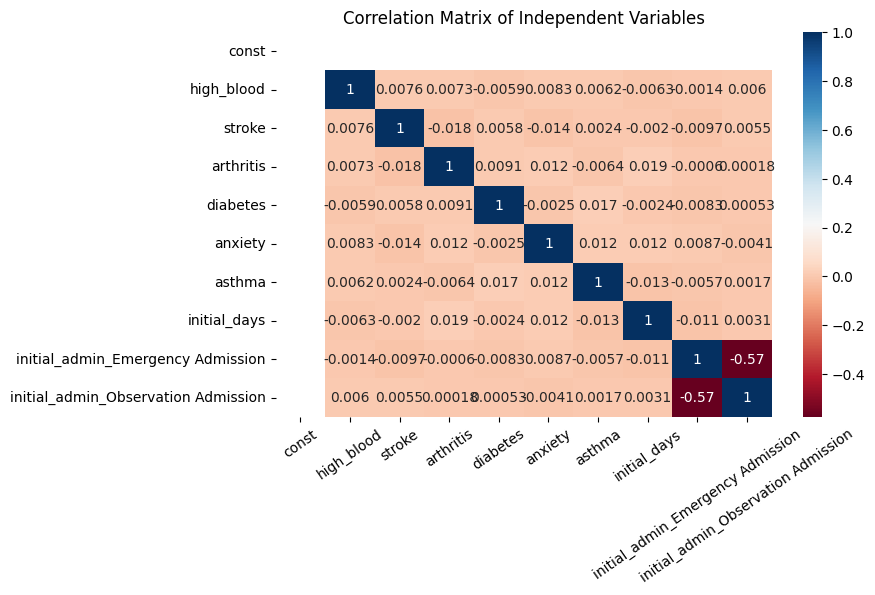

In [54]:
# check the interactions with a correlation matrix
corr = X_reduced.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdBu')
plt.xticks(rotation=35)
plt.title('Correlation Matrix of Independent Variables')    
plt.show()

> ### The corr matrix shows that the remaining variables are not highly correlated with each other. The interaction between variables representing Initial Admission are likely showing interactions between one-hot encoded variables that represent different levels of a single, three level categorical variable, and is likley a result of the encoding process itself.

### Comparisons between the initial and reduced models.
-   The initial model has a `constant` and `16 predictors` with a negative coefficient `-71.2947` and is highly significant (p <= 0.000). <br><br>**The reduced model has a `constant` and `9 predictors` with a negative coefficient `-69.9802` and is highly significant (p <= 0.000).**<br><br>  
-   The initial `Pseudo R-squared` value is `0.9423`.<br><br>**The reduced `Pseudo R-squared` value is `0.9414`.**<br><br>
-   The initial `AIC` value is `791.931`.<br><br>**The reduced `AIC` value is `790.353`.**<br><br>

-   Initial model features  `high_blood`, `stroke`, `diabetes`, `initial_days`, `initial_admin_Observation` and `initial_admin_Emergency` have positive coefficients and are statistically significant (p < 0.05).<br><br>**Reduced model features  `high_blood`, `stroke`, `diabetes`, `initial_days`, `initial_admin_Observation` and `initial_admin_Emergency` have positive coefficients and are statistically significant (p < 0.05).**<br><br>

-   Initial model features `arthritis`, `anxiety`, and `asthma` have negative coefficients and are also statistically significant (p < 0.05).<br><br>**Reduced model features `arthritis`, `anxiety`, and `asthma` have negative coefficients and are also statistically significant (p < 0.05).**<br><br>

-   The initial message: *Possibly complete quasi-separation: A fraction `0.80` of observations can be perfectly predicted* remains, though the fraction has decreased to `0.79`.


## Part IV continued and Part V: Data Summary and Implication

> ## Comparison and Statistical Significance

The initial logistic regression model, which included all available predictors from Part C, resulted in an AIC of 791.93, an Accuracy of 0.9841, and a Pseudo R-squared of 0.9423. After iteratively removing features with the highest p-values that exceeded the 0.05 significance level, a reduced model was achieved. This reduced model had a lower AIC of 790.35, indicating a potentially improved fit (Bobbitt, 2021b). It had an Accuracy of 0.9844, suggesting that adjustments made between the two model didn't detract from the model's statistically accurate predictive capability.The Pseudo R-squared for this reduced model is slightly lower at 0.9414. A small reduction in Pseudo R-squared, while not ideal, can be considered acceptable if the value remains high and the reduction in complexity (number of variables) leads to a more parsimonious model. These trade-offs may be to advantage; it simplifies the model without significantly compromising its ability to fit the data. Additionally, reducing model complexity can improve the model's performance on new data by reducing the risk of overfitting. Here is the reduced model formula:

$$\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = -69.9802 + 0.8529(\text{highblood})$$
$$+ 1.4728(\text{stroke}) - 1.1219(\text{arthritis}) + 0.4222(\text{diabetes}) - 0.8497(\text{anxiety})$$
$$- 1.1260(\text{asthma}) + 1.2713(\text{initialdays}) + 2.0790(\text{EmergencyAdmission}) + 0.6325(\text{ObservationAdmission})$$


- **const** (-69.9802): This coefficient is the y-intercept of the model, indicating the baseline log odds of being readmitted when all other predictors are at their reference levels (typically zero). This suggests that, in the absence of any risk factors or other predictor variables, the probability of readmission is practically zero. This makes sense, as it is highly unlikely for a patient to be readmitted if they have none of the risk factors or characteristics that the model has identified as significant predictors of readmission.




$$\text{p} = \frac{1}{1 + e^{-{(-69.9802)}}} = \text{ 4.0549480770632475e-31 } \text{ ≈ 0}$$




> (using Odds ratio, we can also report in % change in odds using: ((e^(coef))-1) * 100 ((Bobbitt, 2021a))

In [55]:
# calculate percentage change in odds from coefficients
odds_r = np.exp(reduced_results.params)
odds_r = odds_r.to_frame('Odds_r')
odds_r['coef'] = reduced_results.params
odds_r['% change in odds'] = (odds_r['Odds_r'] - 1) * 100
odds_r

,Odds_r,coef,% change in odds
const,4.055118e-31,-69.980158,-100.000000
high_blood,2.346438e+00,0.852898,134.643753
stroke,4.361608e+00,1.472841,336.160838
arthritis,3.256460e-01,-1.121944,-67.435399
diabetes,1.525330e+00,0.422211,52.532968
anxiety,4.275233e-01,-0.849746,-57.247666
asthma,3.243333e-01,-1.125984,-67.566674
initial_days,3.565573e+00,1.271325,256.557344
initial_admin_Emergency Admission,7.996427e+00,2.078995,699.642688
initial_admin_Observation Admission,1.882398e+00,0.632547,88.239810


# Significant Features: According to the reduced model only:

- **High Blood Pressure (0.8529):** Holding all other variables constant, the presence of high blood pressure (high_blood = 1) is associated with an increase of 0.8529 in the natural log of the odds of being readmitted. This implies that having high blood pressure is linked to an approximate 135% increase in the odds of being readmitted, compared to not having high blood pressure (high_blood = 0), assuming all other model variables remain unchanged.

- **Stroke (1.4728):** Holding all other variables constant, having had a stroke (stroke = 1) is associated with an increase of 1.4728 in the natural log of the odds of being readmitted. This means that having had a stroke is linked to an approximate 336% increase in the odds of being readmitted, compared to individuals with no history of stroke (stroke = 0), assuming all other variables are held constant.

- **Arthritis (-1.1219):** Holding all other variables constant, the presence of arthritis (arthritis = 1) is associated with a decrease of 1.1219 in the natural log of the odds of being readmitted. This indicates that having arthritis is linked to an approximate 83% decrease in the odds of being readmitted, compared to not having arthritis (arthritis = 0), when all other variables in the model are held constant.

- **Diabetes (0.4222):** Holding all other variables constant, having diabetes (diabetes = 1) is associated with an increase of 0.4222 in the natural log of the odds of being readmitted. This implies that having diabetes is linked to an approximate 53% increase in the odds of being readmitted, compared to not having diabetes (diabetes = 0), with all other variables in the model held constant.

- **Anxiety (-0.8497):** Holding all other variables constant, the presence of anxiety (anxiety = 1) is associated with a decrease of 0.8497 in the natural log of the odds of being readmitted. This suggests that the presence of anxiety is linked to an approximate 57% decrease in the odds of being readmitted, compared to not having anxiety (anxiety = 0), when all other model variables are unchanged.

- **Asthma (-1.1260):** Holding all other variables constant, having asthma (asthma = 1) is associated with a 1.1260 decrease in the natural log of the odds of being readmitted, equating to a roughly 68% decrease in the odds of readmission due to asthma, assuming all other model variables remain unchanged.

- **Initial Days (1.2713):** Holding all other variables constant, each additional day spent in the hospital (initial_days) is associated with a 1.2713 increase in the natural log of the odds of being readmitted. This translates to an estimated 256% increase in the odds of being readmitted for each one-unit increase in initial days, with all other variables held constant.

- **Emergency Admission (Initial_Admin) (2.0790):** Holding all other variables constant, being initially admitted through the emergency department (initial_admin_Emergency Admission = 1) is associated with a 2.0790 increase in the natural log of the odds of being readmitted compared to elective admission (the reference variable). This indicates that an emergency admission is associated with an approximately 700% increase in the odds of readmission, compared to elective admission, assuming all other factors are constant.

- **Observation Admission (Initial_Admin) (0.6325):** Holding all other variables constant, an initial hospital admission for observation (initial_admin_Observation = 1) is associated with a 0.6325 increase in the natural log of the odds of being readmitted compared to elective admission (the reference variable). This is associated with an 88% increase in the odds of readmission compared to elective admission, when all other model variables are held constant.



Again, it is important to note that these interpretations are based on the results of this model, and may not translate to real-world scenarios. The model is a simplification of the complex relationships between readmission and the predictors included in the analysis. The coefficients provide insights into the relationships between the predictors and the likelihood of readmission, but should be interpreted with caution and in the context of the model's limitations discussed below. 

> # Limitation of the Model and practical Significance:

While the analysis used a methodical approach to build and refine a logistic regression model using statistically-based feature selection and evaluation metrics, it is important to acknowledge some of the inherent limitations of this process. It's important to acknowledge that any correlation does not equal causation, and that the assumptions of logistic regression are met.Although verifying the assumptions underlying logistic regression is crucial for the validity of its results, attempts to thoroughly examine these assumptions were hindered by limited expertise in advanced statistical methods. This underscores the importance of further investigation by a highly experienced analyst to ensure the robustness and reliability of the model's findings. 

The focus on p-values, model parsimony, and measures of fit may not fully capture the practical significance of variables, the potential for meaningful interactions, or the model's generalizability to real-world scenarios. Statistical significance and improved metrics does not necessarily guarantee the model's useability across wider patient populations. It also does not gaurentee its ability to account for the nuances of of complex healthcare dynamics. Additionally, the simplification of the model may inadvertently leave out variables that, while not statistically significant in isolation, may be useful to a broader understanding of the factors influencing hospital readmissions. Also, the approach presumes the accuracy of the initial model's structure and the completeness of the dataset, without considering potential unmeasured factors or the intricacies healthcare. It is important to balance statistical significance and refinement with domain expertise and a comprehensive understanding of the problem and data at hand. Of note, the message about quasi-separation falls outside of this analysts current expertise and requires further investigation and understanding on my part. Which leads to another important limitation: this analysis limited expertise and experience at performing nuanced logistic regression analysis. As well as the limitations in resources and restrictions imposed by deadlines and the scope of the project.

One of the biggest limitations is the dataset itself. The analysis is fundamentally limited by the generality and lack of detailed context in the dataset used. The absence of specific information regarding the timing and circumstances of variables related to hospital readmissions hinders the interpretation of the model's predictors and the assessment of its predictive validity. Without knowing when surveys were conducted or when certain conditions were diagnosed, it becomes challenging to determine the appropriateness of the features included in the model. This lack of granularity in the data raises concerns about the model's practical utility for making informed decisions in clinical or business settings. Although the model may uncover patterns worthy of further exploration, its current state, constrained by the broad strokes of the data, limits its applicability for actionable insights. To enhance the dataset's robustness and support a more precise and informative modeling process, it is recommended to acquire more detailed and context-rich data aligned with specific research questions. Engaging with domain experts and data collection specialists is crucial in this endeavor. Ultimately, while the current model provides a glimpse into potential factors influencing hospital readmissions, using it in decision-making processes without a richer data foundation would be ill-advised.

>  ### References

- Bobbitt, Z. (2020). *Assumptions of Logistic Regression*. Statology. Retrieved from [https://www.statology.org/assumptions-of-logistic-regression/](https://www.statology.org/assumptions-of-logistic-regression/).

- Bobbitt, Z. (2021a). *How to Interpret an Odds Ratio Less Than 1*. Statology. Retrieved from [https://www.statology.org/interpret-odds-ratio-less-than-1/](https://www.statology.org/interpret-odds-ratio-less-than-1/).

- Python Graph Gallery. (2023). *The Python Graph Gallery*. Retrieved from [https://python-graph-gallery.com/](https://python-graph-gallery.com/).

- Bobbitt, Z. (2021b). *AIC in Python*. Statology. Retrieved from [https://www.statology.org/aic-in-python/](https://www.statology.org/aic-in-python/).

- Straw, D. (2023). *Dr. Straw’s Tips for Success in D208*. Western Governors University. Retrieved from [https://westerngovernorsuniversity.sharepoint.com/sites/DataScienceTeam/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=9ccodm&cid=08b75b57-534a-4349-a6a0-7213f88a1d9a](https://westerngovernorsuniversity.sharepoint.com/sites/DataScienceTeam/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=9ccodm&cid=08b75b57-534a-4349-a6a0-7213f88a1d9a).


The following software packages were used in this project:

* **pandas** pandas is a Python library providing data structures and data analysis tools.
* **numpy** NumPy is a Python library for scientific computing.
* **matplotlib** Matplotlib is a Python library for creating static, animated, and interactive visualizations.
* **seaborn** Seaborn is a Python library for statistical data visualization built on top of matplotlib.
* **statsmodels** Statsmodels is a Python library for statistical modeling and econometrics.

- Python Software Foundation. (2023). Python Language Reference, version 3.9.6. Retrieved from https://www.python.org

- Matplotlib:
  Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90-95. Retrieved from https://matplotlib.org

- Statsmodels:
  Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with python. In *Proceedings of the 9th Python in Science Conference* (Vol. 57, p. 61). Retrieved from https://www.statsmodels.org

- Pandas:
  McKinney, W. (2010). Data Structures for Statistical Computing in Python. In *Proceedings of the 9th Python in Science Conference* (pp. 51-56). Retrieved from https://pandas.pydata.org

- NumPy:
  Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature, 585*(7825), 357-362. Retrieved from https://numpy.org

- Seaborn:
  Waskom, M. (2021). Seaborn: statistical data visualization. *Journal of Open Source Software, 6*(60), 3021. Retrieved from https://seaborn.pydata.org